In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import plotly.express as px
!pip install pymannkendall
import pymannkendall as mk
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.arima.model import ARIMA 
from sklearn.metrics import mean_squared_error
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly,add_changepoints_to_plot
import warnings
warnings.filterwarnings('ignore')


In [2]:
def adf_test(df):
    plt.figure(figsize = (15,8))
    fig = px.line(df, x = df.index  , y = "Sales")
    fig.show()
    adf = adfuller(df, autolag = 'AIC')
    print("Test Statistic:", adf[0] , '\n\n' "P-value:", adf[1], '\n\n' "Number of lag:" ,adf[2])
    plt.rcParams.update({'figure.figsize': (16,12)})

In [3]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

In [4]:
df  = pd.read_excel("C:\\Users\\Shivani Bhavsar\\OneDrive\\Documents\\ExcelR Assignment files\\DS\\A18 Forecast\\CocaCola_Sales_Rawdata.xlsx")
df

Quarter        Sales
0    Q1_86  1734.827000
1    Q2_86  2244.960999
2    Q3_86  2533.804993
3    Q4_86  2154.962997
4    Q1_87  1547.818996
5    Q2_87  2104.411995
6    Q3_87  2014.362999
7    Q4_87  1991.746998
8    Q1_88  1869.049999
9    Q2_88  2313.631996
10   Q3_88  2128.320000
11   Q4_88  2026.828999
12   Q1_89  1910.603996
13   Q2_89  2331.164993
14   Q3_89  2206.549995
15   Q4_89  2173.967995
16   Q1_90  2148.278000
17   Q2_90  2739.307999
18   Q3_90  2792.753998
19   Q4_90  2556.009995
20   Q1_91  2480.973999
21   Q2_91  3039.522995
22   Q3_91  3172.115997
23   Q4_91  2879.000999
24   Q1_92  2772.000000
25   Q2_92  3550.000000
26   Q3_92  3508.000000
27   Q4_92  3243.859993
28   Q1_93  3056.000000
29   Q2_93  3899.000000
30   Q3_93  3629.000000
31   Q4_93  3373.000000
32   Q1_94  3352.000000
33   Q2_94  4342.000000
34   Q3_94  4461.000000
35   Q4_94  4017.000000
36   Q1_95  3854.000000
37   Q2_95  4936.000000
38   Q3_95  4895.000000
39   Q4_95  4333.000000
40   Q1_96  4194.000000
41   Q2_96  5253.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [6]:
df.describe()

Sales
count    42.000000
mean   2994.353308
std     977.930896
min    1547.818996
25%    2159.714247
50%    2782.376999
75%    3609.250000
max    5253.000000

## Convert Quarter formate to Date: 

In [7]:
index = pd.date_range(start='1986-1-1', periods=42, freq='Q')
df["Time"] = index
df = df.drop(["Quarter"], axis=1)
df.set_index("Time", inplace = True)
df 

Sales
Time                   
1986-03-31  1734.827000
1986-06-30  2244.960999
1986-09-30  2533.804993
1986-12-31  2154.962997
1987-03-31  1547.818996
1987-06-30  2104.411995
1987-09-30  2014.362999
1987-12-31  1991.746998
1988-03-31  1869.049999
1988-06-30  2313.631996
1988-09-30  2128.320000
1988-12-31  2026.828999
1989-03-31  1910.603996
1989-06-30  2331.164993
1989-09-30  2206.549995
1989-12-31  2173.967995
1990-03-31  2148.278000
1990-06-30  2739.307999
1990-09-30  2792.753998
1990-12-31  2556.009995
1991-03-31  2480.973999
1991-06-30  3039.522995
1991-09-30  3172.115997
1991-12-31  2879.000999
1992-03-31  2772.000000
1992-06-30  3550.000000
1992-09-30  3508.000000
1992-12-31  3243.859993
1993-03-31  3056.000000
1993-06-30  3899.000000
1993-09-30  3629.000000
1993-12-31  3373.000000
1994-03-31  3352.000000
1994-06-30  4342.000000
1994-09-30  4461.000000
1994-12-31  4017.000000
1995-03-31  3854.000000
1995-06-30  4936.000000
1995-09-30  4895.000000
1995-12-31  4333.000000
1996-03-31  4194.000000
1996-06-30  5253.000000

## Perform Mann-Kendall Trend Test(Trend detection):

* H0 : No trend 
* H1 : Trend is present

In [8]:
mk.original_test(df["Sales"])

Mann_Kendall_Test(trend='increasing', h=True, p=2.177369395894857e-12, z=7.022628287809829, Tau=0.7537746806039489, s=649.0, var_s=8514.333333333334, slope=72.2794002532959, intercept=1300.6492937088012)

* **Conclusion :**  Here we  Reject Ho, p-value 0.05 < 0.000  i.e. The Increasing trend is  present in the given series, for solving this problem we take differencing.

## Augmented Dickey-Fuller Test (Stationary detection [Constant mean and variance]):


* H0 : not stationary 
* H1 : stationarity present 

In [9]:
adf_test(df["Sales"])

Test Statistic: 1.3094210153268104 

P-value: 0.9966611673930905 

Number of lag: 7


<Figure size 1080x576 with 0 Axes>

* **Conclusion :**  Here we do not Reject Ho p-value 0.05 < 0.99 i.e. The data does not follow Stationarity in the given series. So now we need to take a difference. 

## Decomposition :
* **A rule of thumb for selecting the right model is to see in our plot if the trend and seasonal variation are relatively constant over time, in other words, linear. If yes, then we will select the Additive model. Otherwise, if the trend and seasonal variation increase or decrease over time then we use the Multiplicative model.**

> Our data here are aggregated by month. The period we want to analyze is by year so that's why we set the period to 12.

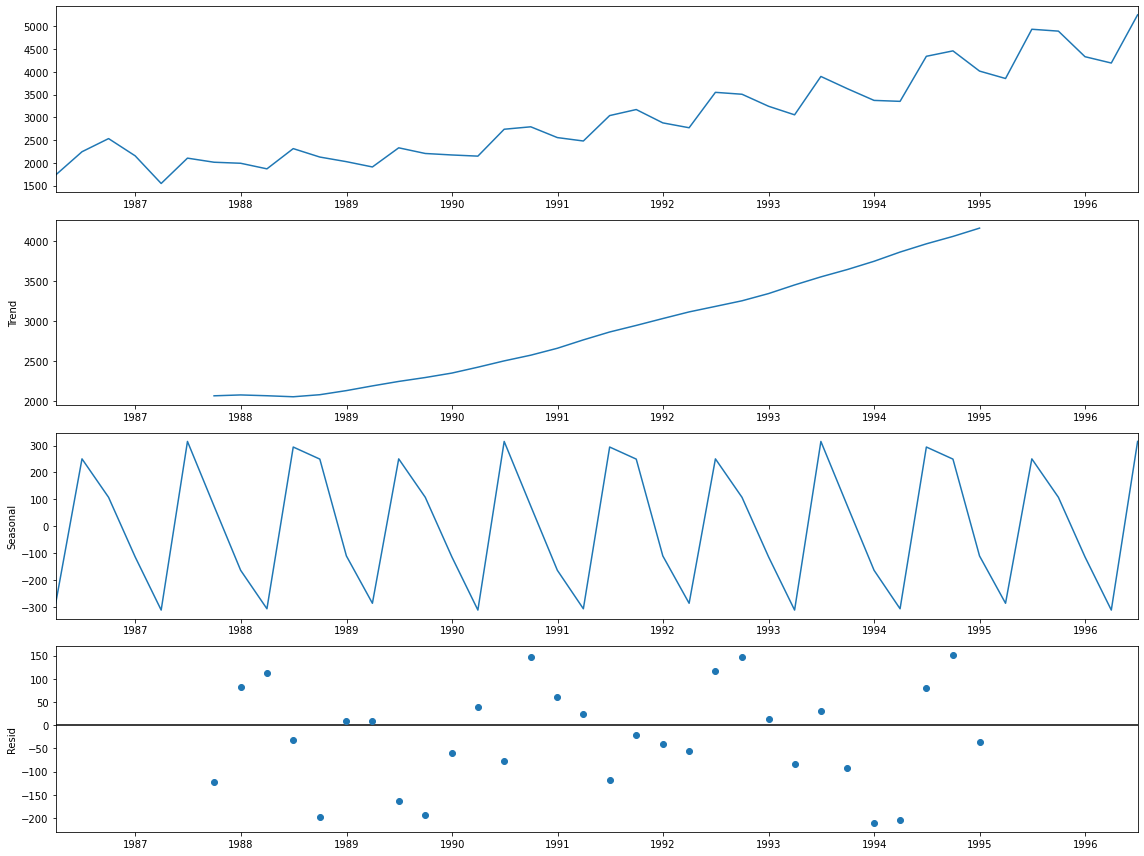

In [10]:
dec = seasonal_decompose(df,period = 12).plot()
plt.show()

## Differencing Method:

* 1.Differencing
* 2.Trandforming
* 3.Rolling mean
> Here we perform differencing method.

In [11]:
# First Diff.
df_diff = df.diff().dropna()
adf_test(df_diff)

Test Statistic: -2.5015370020337975 

P-value: 0.1151008033240557 

Number of lag: 3


<Figure size 1080x576 with 0 Axes>

* **Conclusion :**  Here we do not Reject Ho p-value 0.05 < 0.11 i.e. The data does not follow Stationarity in the given series. So now we need to take a difference. 

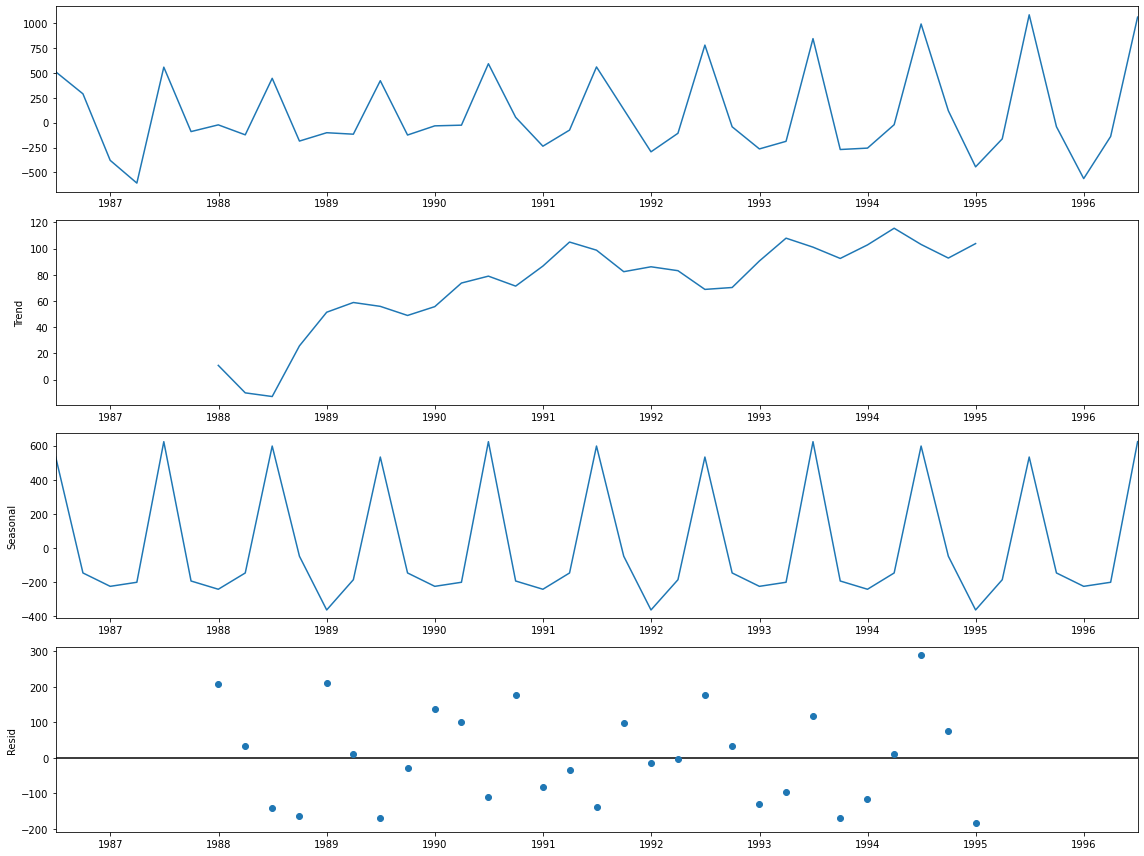

In [12]:
dec = seasonal_decompose(df_diff,period = 12).plot()
plt.show()

In [13]:
df_diff_diff = df_diff.diff()
df_diff_diff = df_diff_diff.dropna()
adf_test(df_diff_diff)

Test Statistic: -27.63262494638169 

P-value: 0.0 

Number of lag: 2


<Figure size 1080x576 with 0 Axes>

* **Conclusion :**  Here we do not Reject Ho p-value 0.05 < 0.000 i.e. The data follow Stationarity in the given series.

## After Diff. Perform Mann-Kendall Trend Test(Trend detection):

* H0 : No trend 
* H1 : Trend is present

In [14]:
mk.original_test(df_diff_diff["Sales"])

Mann_Kendall_Test(trend='no trend', h=False, p=0.3107545604252415, z=1.0136400067817055, Tau=0.11282051282051282, s=88.0, var_s=7366.666666666667, slope=8.580180962880451, intercept=-156.86752581596372)

* **Conclusion :**  Here we do not Reject Ho, p-value 0.05 < 0.31  i.e. There is No trend present in the given series.

The lag plot below allows to check a lag correlation. If you can identify a structure in the plot, the data doesn't look random and the autocorrelation is indeed present. In this case I will check the lag plot for lags of 1,2,3,4 months.

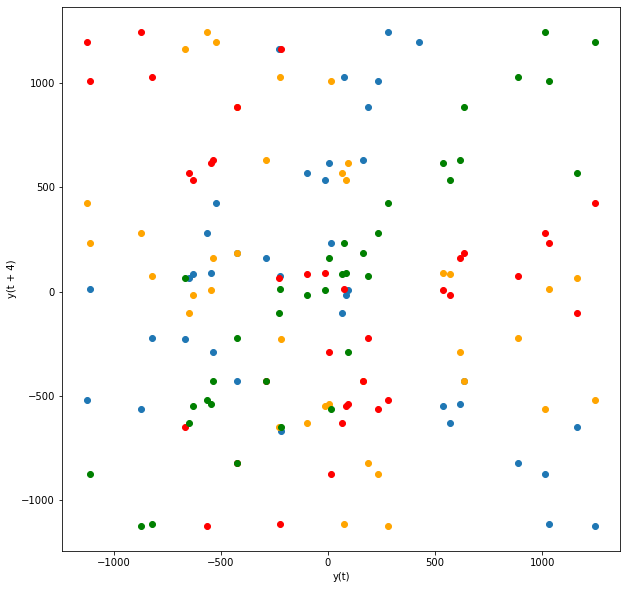

In [15]:
from pandas.plotting import lag_plot

fig, ax = plt.subplots(figsize=(10, 10))
ax = lag_plot(df_diff_diff, lag=1)
ax = lag_plot(df_diff_diff, lag=2, c="orange")
ax = lag_plot(df_diff_diff, lag=3, c="red")
ax = lag_plot(df_diff_diff, lag=4, c="green")

## Plotting ACF and PACF :

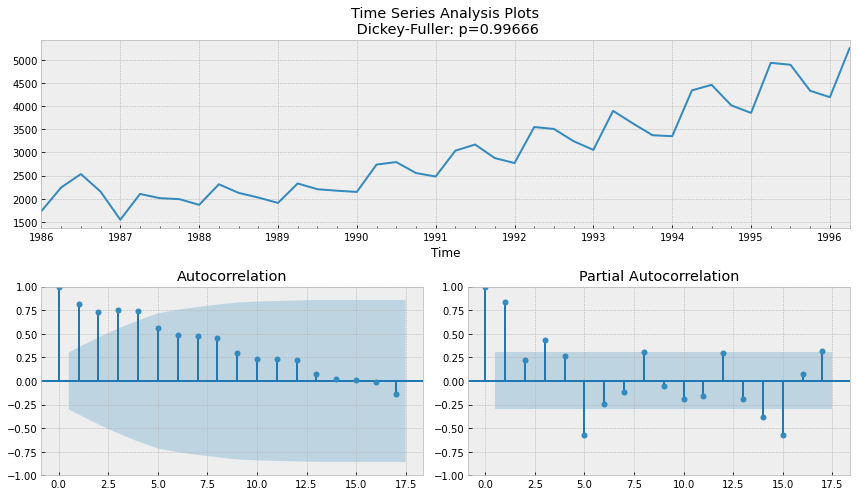

In [16]:
tsplot(df['Sales'])

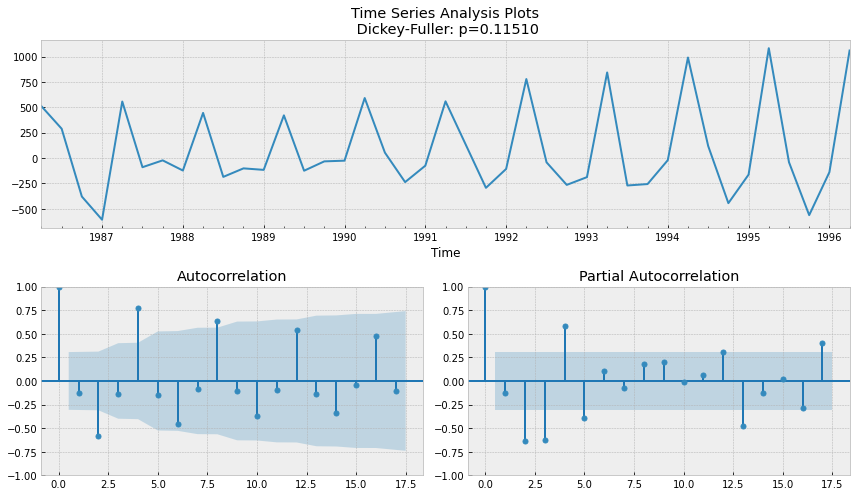

In [17]:
tsplot(df_diff['Sales'])

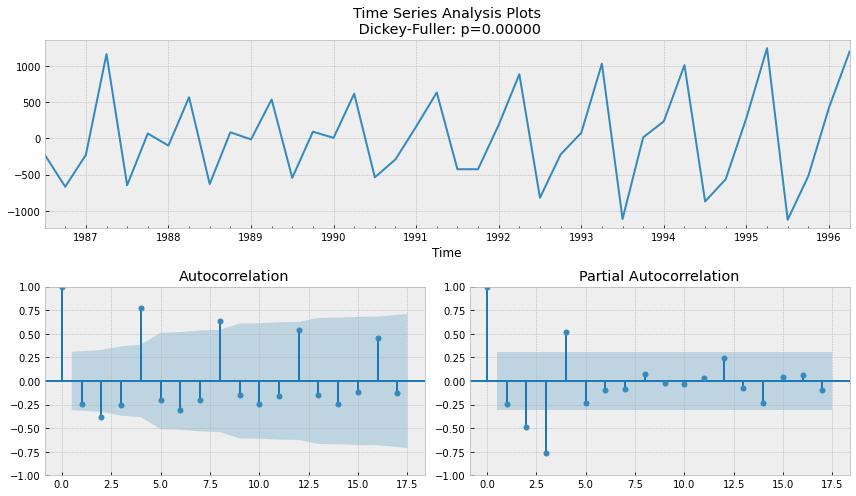

In [18]:
tsplot(df_diff_diff['Sales'])

* From the above plots, the following order of ARIMA model is selected from the selection criteria mentioned above :
* The data passed for model fitting is the Sales data that is differenced data and stationary data.
* Thus, this differencing of data is carried out by the ARIMA model with the help of the d parameter that provides info about the order of differencing.
* Thus, the parameters p and q are selected in such a way that we pass their values assuming the ARIMA model carries out the differencing process and makes the time series stationary.

## Model Building:

In [19]:
model = ARIMA(df['Sales'],order = (3,2,0))
model = model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   42
Model:                 ARIMA(3, 2, 0)   Log Likelihood                -267.922
Date:                Wed, 14 Dec 2022   AIC                            543.843
Time:                        22:39:40   BIC                            550.599
Sample:                    03-31-1986   HQIC                           546.286
                         - 06-30-1996                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9851      0.045    -22.039      0.000      -1.073      -0.897
ar.L2         -1.0094      0.046    -22.062      0.000      -1.099      -0.920
ar.L3         -0.9500      0.046    -20.476      0.0

<AxesSubplot:xlabel='Time'>

<Figure size 720x504 with 0 Axes>

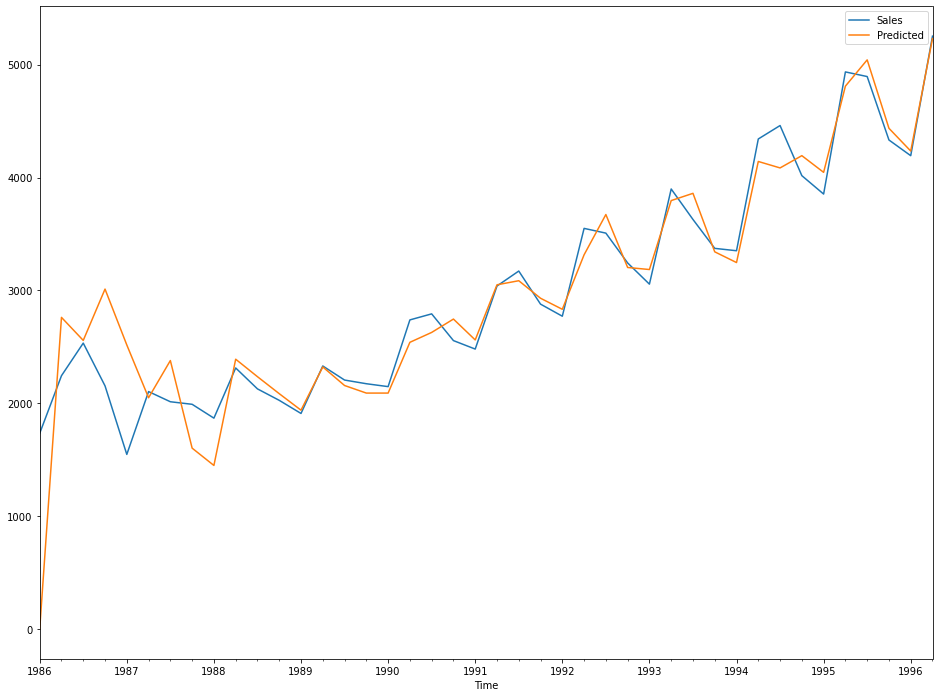

In [20]:
plt.figure(figsize = (10,7))
pred = model.predict()
df.plot(legend=True)
pred.plot(label="Predicted",legend=True)

<AxesSubplot:xlabel='Time'>

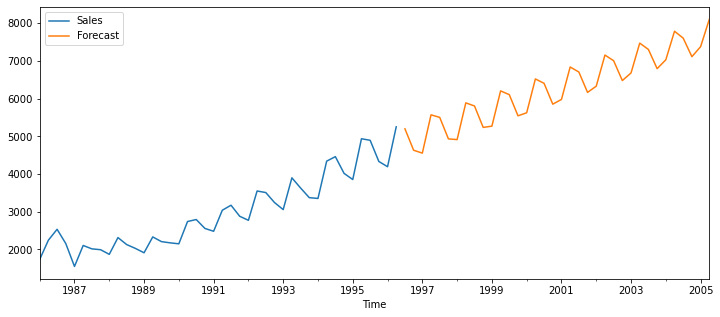

In [21]:
# Actual vs Fitted
forecast = model.predict(start = len(df), 
                          end = (len(df)-1) + 3 * 12, 
                          typ = 'levels').rename('Forecast')
# Plot the forecast values

df['Sales'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)

In [22]:
forecast

1996-09-30    5199.801327
1996-12-31    4631.063270
1997-03-31    4554.788731
1997-06-30    5570.388180
1997-09-30    5503.026596
1997-12-31    4932.461743
1998-03-31    4913.514122
1998-06-30    5887.939508
1998-09-30    5805.005533
1998-12-31    5236.883469
1999-03-31    5270.364412
1999-06-30    6205.470203
1999-09-30    6106.025514
1999-12-31    5544.052041
2000-03-31    5625.496393
2000-06-30    6522.831821
2000-09-30    6406.337087
2000-12-31    5853.721541
2001-03-31    5979.040429
2001-06-30    6839.906163
2001-09-30    6706.158720
2001-12-31    6165.672225
2002-03-31    6331.104746
2002-06-30    7156.600887
2002-09-30    7005.680885
2002-12-31    6479.706856
2003-03-31    6681.779096
2003-06-30    7472.845731
2003-09-30    7305.069573
2003-12-31    6795.647576
2004-03-31    7031.137876
2004-06-30    7788.589252
2004-09-30    7604.469325
2004-12-31    7113.333251
2005-03-31    7379.242786
2005-06-30    8103.796012
Freq: Q-DEC, Name: Forecast, dtype: float64

In [23]:
error = np.sqrt(mean_squared_error(df["Sales"],pred))
print('Test RMSE: %.4f' % error)

Test RMSE: 379.5045


## Ljung-Box test:
The Ljung-Box test is a statistical test that checks if autocorrelation exists in a time series.

* H0 : independently distributed  
* H1 : not independently distribute

In [24]:
sm.stats.acorr_ljungbox(model.resid, lags=[1], return_df=True)

lb_stat  lb_pvalue
1  0.02286   0.879823

* Conclusion: 
Here p-value = 0.05 <0.87, we do not Reject Ho i.e. The data are independently distributed in the given series. 

## In - Sample Forecasting :
* In - Sample Forecasting : Model forecasts values for the existing data points of the time series. It is similar to the train - test format for regression or classification problems.
* We divide the data into train and test dataset. We reserve the last 30 elements for the test dataset and the remaining for the train dataset.
* For this In - Sample Forecasting, we use the rolling forecast method i.e we predict or forecast a single value and use this predicted value again for model fitting for predicting the next value.

In [25]:
train = df["Sales"].iloc[:-30]
test = df["Sales"].iloc[-30:]
print(train.shape , test.shape, df.shape)

(12,) (30,) (42, 1)


In [26]:
print('\t ARIMA MODEL : In- Sample Forecasting \n')

history = [x for x in train]
predictions = []

for t in range(len(test)):
    
    model = ARIMA(history, order=(5,2,0))
    model_fit = model.fit()
    
    output = model_fit.forecast(steps=1)
    yhat = output[0]
    predictions.append(float(yhat))
    
    obs = test[t]
    history.append(obs)
    print('predicted = %f, expected = %f' % (yhat, obs))


	 ARIMA MODEL : In- Sample Forecasting 

predicted = 1986.632854, expected = 1910.603996
predicted = 2295.184354, expected = 2331.164993
predicted = 2104.856080, expected = 2206.549995
predicted = 2218.719153, expected = 2173.967995
predicted = 2074.262890, expected = 2148.278000
predicted = 2505.715482, expected = 2739.307999
predicted = 2575.527213, expected = 2792.753998
predicted = 2770.612578, expected = 2556.009995
predicted = 2513.311339, expected = 2480.973999
predicted = 3086.506832, expected = 3039.522995
predicted = 3064.698005, expected = 3172.115997
predicted = 2984.910304, expected = 2879.000999
predicted = 2826.889048, expected = 2772.000000
predicted = 3309.693876, expected = 3550.000000
predicted = 3667.589948, expected = 3508.000000
predicted = 3145.362014, expected = 3243.859993
predicted = 3284.325581, expected = 3056.000000
predicted = 3777.885008, expected = 3899.000000
predicted = 3856.323556, expected = 3629.000000
predicted = 3366.632673, expected = 3373.000000

In [27]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   41
Model:                 ARIMA(5, 2, 0)   Log Likelihood                -260.928
Date:                Wed, 14 Dec 2022   AIC                            533.856
Time:                        22:39:44   BIC                            543.837
Sample:                             0   HQIC                           537.437
                                 - 41                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0269      0.146     -7.029      0.000      -1.313      -0.741
ar.L2         -1.2777      0.265     -4.826      0.000      -1.797      -0.759
ar.L3         -1.2351      0.273     -4.529      0.0

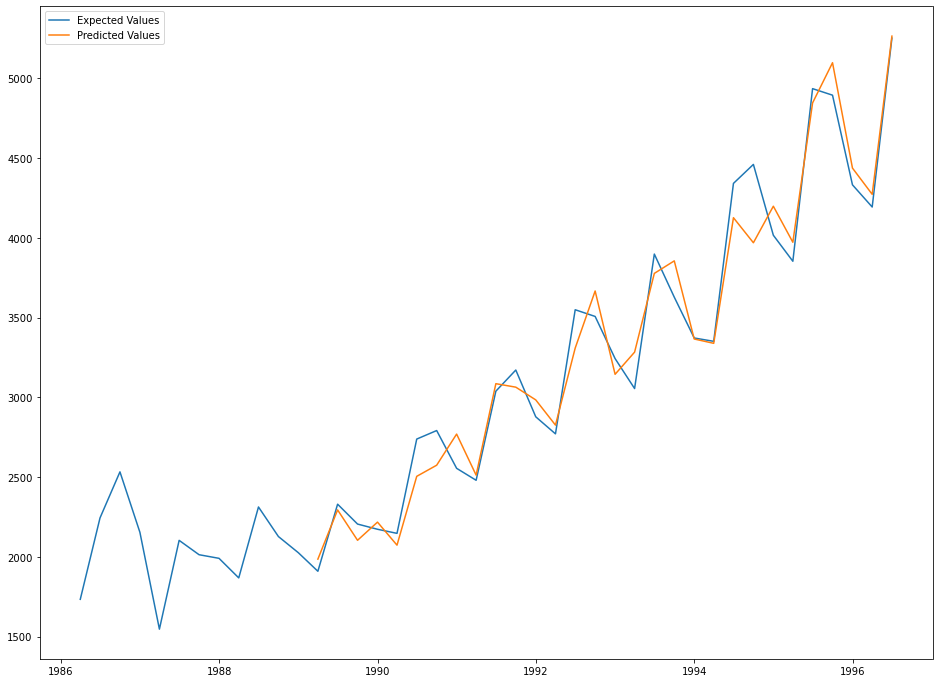

In [28]:
predictions_series = pd.Series(predictions, index = test.index)
plt.plot(df['Sales'],label = 'Expected Values')
plt.plot(predictions_series,label = 'Predicted Values');
plt.legend(loc="upper left")
plt.show()

In [29]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
  
# Calculate root mean squared error
rmse(test, predictions)


164.82004496240413

In [30]:
test.mean()

3369.937031809489

> Here RMSE is different from the test data set, so it's a good model

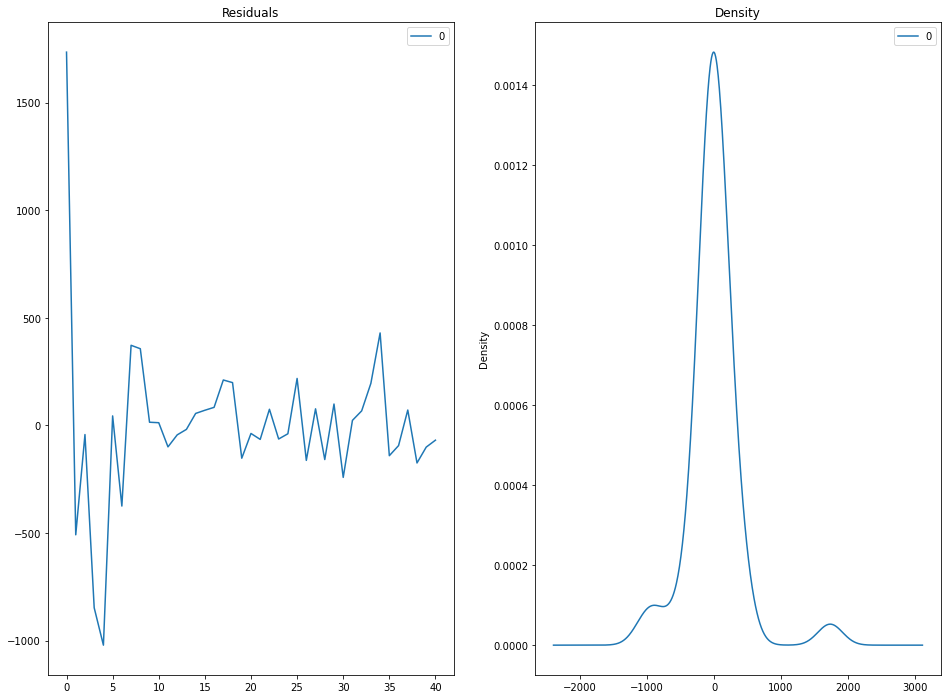

In [31]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [32]:
df.tail()

Sales
Time              
1995-06-30  4936.0
1995-09-30  4895.0
1995-12-31  4333.0
1996-03-31  4194.0
1996-06-30  5253.0

In [33]:
index_future_dates = pd.date_range(start='1996-07-1', periods=12, freq='Q')
fut_pred = model_fit.predict(start=len(df), end=len(df)+12, typ="levels")
fut_val = fut_pred[-12:]
fut_fc = pd.DataFrame({'Sales' : fut_val},index=index_future_dates)
fut_fc

Sales
1996-09-30  4649.327880
1996-12-31  4564.280958
1997-03-31  5592.659687
1997-06-30  5502.691242
1997-09-30  4968.411671
1997-12-31  4934.832258
1998-03-31  5918.600436
1998-06-30  5803.121757
1998-09-30  5289.911520
1998-12-31  5303.749593
1999-03-31  6243.160670
1999-06-30  6104.378038

<AxesSubplot:xlabel='Time'>

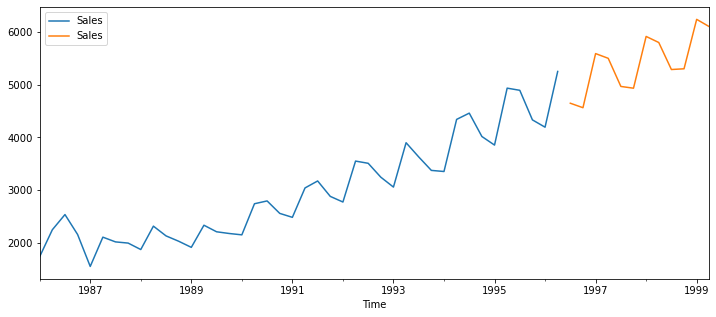

In [34]:
df['Sales'].plot(figsize = (12, 5), legend = True)
fut_fc["Sales"].plot(legend = True)

## Ljung-Box test:
The Ljung-Box test is a statistical test that checks if autocorrelation exists in a time series.

* H0 : independently distributed  
* H1 : not independently distribute

In [35]:
sm.stats.acorr_ljungbox(model_fit.resid, lags=[1], return_df=True)

lb_stat  lb_pvalue
1  0.00169   0.967207

* Conclusion: 
Here p-value = 0.05 <0.96, we do not Reject Ho i.e. The data are independently distributed in the given series. 

## AUTO ARIMA:

In [36]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [37]:
from pmdarima import auto_arima

In [38]:
model3 = auto_arima(df, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=4,              # periodicity=12
                      d=None,           # let model determine 'd'
                      seasonal=True,   # Seasonality
                      start_P=0, 
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

# model3_fit = model3.fit()
print(model3.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[4]             : AIC=490.683, Time=0.10 sec
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=488.648, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=491.401, Time=0.02 sec
 ARIMA(0,1,1)(0,1,1)[4]             : AIC=491.202, Time=0.05 sec
 ARIMA(0,1,0)(1,1,0)[4]             : AIC=489.549, Time=0.04 sec
 ARIMA(0,1,0)(0,1,1)[4]             : AIC=489.438, Time=0.03 sec
 ARIMA(0,1,0)(1,1,1)[4]             : AIC=491.336, Time=0.07 sec
 ARIMA(1,1,0)(0,1,0)[4]             : AIC=490.586, Time=0.02 sec
 ARIMA(0,1,1)(0,1,0)[4]             : AIC=490.538, Time=0.01 sec
 ARIMA(1,1,1)(0,1,0)[4]             : AIC=489.597, Time=0.05 sec
 ARIMA(0,1,0)(0,1,0)[4] intercept   : AIC=490.419, Time=0.00 sec

Best model:  ARIMA(0,1,0)(0,1,0)[4]          
Total fit time: 0.401 seconds
                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:       

<AxesSubplot:xlabel='Time'>

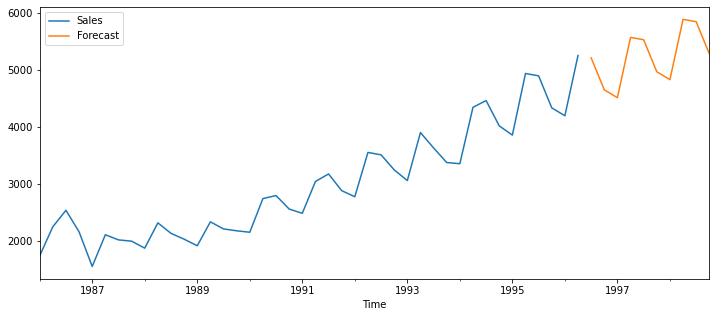

In [39]:
# Actual vs Fitted
forecast = model3.predict(start = len(df), 
                          end = (len(df)-1) + 3 * 12, 
                          typ = 'levels').rename('Forecast')
# Plot the forecast values

df['Sales'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)

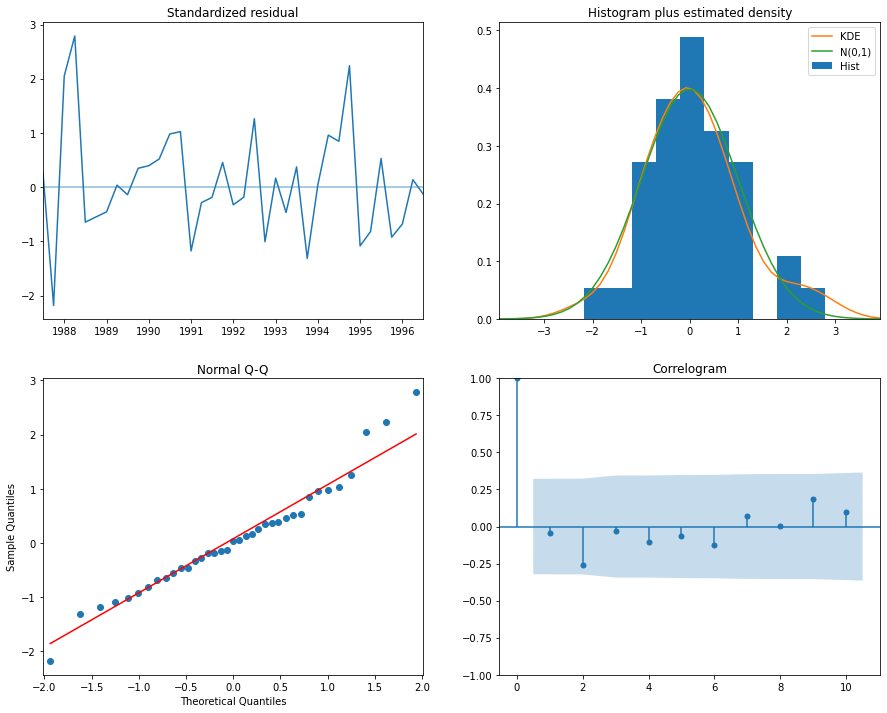

In [40]:
model3.plot_diagnostics(figsize=(15, 12))
plt.show()

In [41]:
forecast

1996-09-30    5212.0
1996-12-31    4650.0
1997-03-31    4511.0
1997-06-30    5570.0
1997-09-30    5529.0
1997-12-31    4967.0
1998-03-31    4828.0
1998-06-30    5887.0
1998-09-30    5846.0
1998-12-31    5284.0
Freq: Q-DEC, Name: Forecast, dtype: float64

## FB Prophet:

In [42]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [53]:
df.reset_index()
df

index       Time        Sales
0       0 1986-03-31  1734.827000
1       1 1986-06-30  2244.960999
2       2 1986-09-30  2533.804993
3       3 1986-12-31  2154.962997
4       4 1987-03-31  1547.818996
5       5 1987-06-30  2104.411995
6       6 1987-09-30  2014.362999
7       7 1987-12-31  1991.746998
8       8 1988-03-31  1869.049999
9       9 1988-06-30  2313.631996
10     10 1988-09-30  2128.320000
11     11 1988-12-31  2026.828999
12     12 1989-03-31  1910.603996
13     13 1989-06-30  2331.164993
14     14 1989-09-30  2206.549995
15     15 1989-12-31  2173.967995
16     16 1990-03-31  2148.278000
17     17 1990-06-30  2739.307999
18     18 1990-09-30  2792.753998
19     19 1990-12-31  2556.009995
20     20 1991-03-31  2480.973999
21     21 1991-06-30  3039.522995
22     22 1991-09-30  3172.115997
23     23 1991-12-31  2879.000999
24     24 1992-03-31  2772.000000
25     25 1992-06-30  3550.000000
26     26 1992-09-30  3508.000000
27     27 1992-12-31  3243.859993
28     28 1993-03-31  3056.000000
29     29 1993-06-30  3899.000000
30     30 1993-09-30  3629.000000
31     31 1993-12-31  3373.000000
32     32 1994-03-31  3352.000000
33     33 1994-06-30  4342.000000
34     34 1994-09-30  4461.000000
35     35 1994-12-31  4017.000000
36     36 1995-03-31  3854.000000
37     37 1995-06-30  4936.000000
38     38 1995-09-30  4895.000000
39     39 1995-12-31  4333.000000
40     40 1996-03-31  4194.000000
41     41 1996-06-30  5253.000000

## Change column Names for FB Prophet

In [54]:
train_dataset= pd.DataFrame()
train_dataset['ds'] = df['Time']
train_dataset['y']= df['Sales']
train_dataset.head(115)

ds            y
0  1986-03-31  1734.827000
1  1986-06-30  2244.960999
2  1986-09-30  2533.804993
3  1986-12-31  2154.962997
4  1987-03-31  1547.818996
5  1987-06-30  2104.411995
6  1987-09-30  2014.362999
7  1987-12-31  1991.746998
8  1988-03-31  1869.049999
9  1988-06-30  2313.631996
10 1988-09-30  2128.320000
11 1988-12-31  2026.828999
12 1989-03-31  1910.603996
13 1989-06-30  2331.164993
14 1989-09-30  2206.549995
15 1989-12-31  2173.967995
16 1990-03-31  2148.278000
17 1990-06-30  2739.307999
18 1990-09-30  2792.753998
19 1990-12-31  2556.009995
20 1991-03-31  2480.973999
21 1991-06-30  3039.522995
22 1991-09-30  3172.115997
23 1991-12-31  2879.000999
24 1992-03-31  2772.000000
25 1992-06-30  3550.000000
26 1992-09-30  3508.000000
27 1992-12-31  3243.859993
28 1993-03-31  3056.000000
29 1993-06-30  3899.000000
30 1993-09-30  3629.000000
31 1993-12-31  3373.000000
32 1994-03-31  3352.000000
33 1994-06-30  4342.000000
34 1994-09-30  4461.000000
35 1994-12-31  4017.000000
36 1995-03-31  3854.000000
37 1995-06-30  4936.000000
38 1995-09-30  4895.000000
39 1995-12-31  4333.000000
40 1996-03-31  4194.000000
41 1996-06-30  5253.000000

In [57]:
m = Prophet()
m.fit(train_dataset)
future = m.make_future_dataframe(periods=10, freq='Q')
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

22:44:37 - cmdstanpy - INFO - Chain [1] start processing
22:44:37 - cmdstanpy - INFO - Chain [1] done processing


ds         yhat   yhat_lower   yhat_upper
0  1986-03-31  1610.924483  1430.782326  1791.546768
1  1986-06-30  2246.517004  2069.524504  2434.648646
2  1986-09-30  2225.267396  2044.406377  2418.650803
3  1986-12-31  1877.590465  1695.438073  2059.247816
4  1987-03-31  1648.035221  1471.792903  1833.450013
5  1987-06-30  2325.731699  2154.573987  2500.383521
6  1987-09-30  2328.605331  2151.582305  2503.038314
7  1987-12-31  1962.408423  1777.306781  2135.986332
8  1988-03-31  1751.239433  1583.145513  1928.710052
9  1988-06-30  2443.067172  2258.001545  2632.401176
10 1988-09-30  2178.841003  1980.716441  2368.309053
11 1988-12-31  1977.264659  1797.562497  2171.945594
12 1989-03-31  1830.482789  1650.294016  2016.289388
13 1989-06-30  2471.060206  2292.239189  2654.754973
14 1989-09-30  2361.015511  2174.784299  2543.239514
15 1989-12-31  2143.621995  1963.225539  2323.029428
16 1990-03-31  2038.359559  1857.855064  2209.958378
17 1990-06-30  2748.654236  2563.688464  2926.244128
18 1990-09-30  2802.969236  2617.208296  2983.254871
19 1990-12-31  2530.863847  2345.758822  2721.980127
20 1991-03-31  2375.250100  2192.604430  2554.730697
21 1991-06-30  3127.823424  2942.032629  3306.242525
22 1991-09-30  3206.396568  3015.819091  3390.475161
23 1991-12-31  2915.971640  2742.474107  3109.828085
24 1992-03-31  2779.828239  2609.431613  2963.001874
25 1992-06-30  3546.732143  3365.573036  3718.293677
26 1992-09-30  3358.345555  3184.982709  3536.649937
27 1992-12-31  3232.580999  3042.041122  3403.236837
28 1993-03-31  3162.785577  2976.181936  3336.020097
29 1993-06-30  3881.209124  3711.194191  4061.375170
30 1993-09-30  3849.817669  3687.146022  4032.187268
31 1993-12-31  3635.897512  3454.740349  3803.152739
32 1994-03-31  3534.095923  3354.663325  3719.947369
33 1994-06-30  4247.972176  4045.931332  4434.712645
34 1994-09-30  4305.866559  4118.344650  4484.786027
35 1994-12-31  4037.333619  3861.447423  4216.213151
36 1995-03-31  3885.201845  3696.988359  4049.921259
37 1995-06-30  4641.182055  4454.488504  4826.976605
38 1995-09-30  4723.199522  4544.255952  4894.882655
39 1995-12-31  4436.110113  4264.691830  4614.319648
40 1996-03-31  4303.188759  4127.683632  4485.401893
41 1996-06-30  5073.234144  4897.150847  5263.346913
42 1996-09-30  4888.023558  4703.922508  5080.279059
43 1996-12-31  4765.426023  4571.992685  4943.625009
44 1997-03-31  4695.906031  4511.781836  4877.313902
45 1997-06-30  5414.577400  5226.881370  5618.863900
46 1997-09-30  5383.371439  5205.275008  5569.719732
47 1997-12-31  5169.636777  4988.975583  5357.080724
48 1998-03-31  5067.916559  4882.718897  5263.241267
49 1998-06-30  5781.792811  5596.851344  5986.697279
50 1998-09-30  5839.687194  5626.517029  6035.557867
51 1998-12-31  5571.154255  5356.824430  5780.028369

In [58]:
plot_plotly(m , forecast)

In [59]:
plot_components_plotly(m,forecast)

22:44:43 - cmdstanpy - INFO - Chain [1] start processing
22:44:43 - cmdstanpy - INFO - Chain [1] done processing


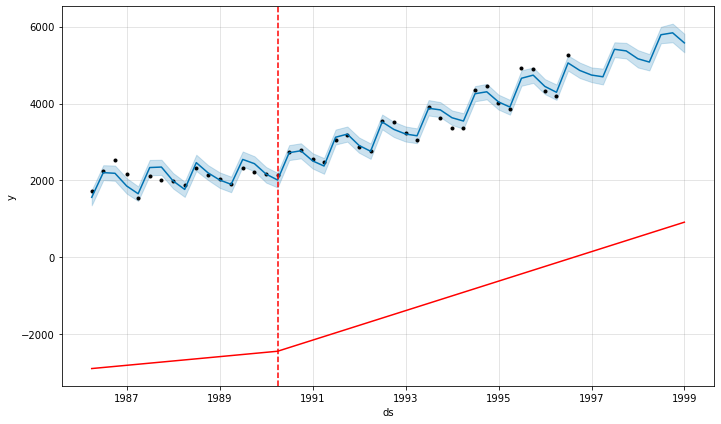

In [60]:
pro_change= Prophet(n_changepoints=4)
forecast = pro_change.fit(train_dataset).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)